In [1]:
# Importing naumpy and pandas libraries to read the data

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
advertising = pd.read_csv("a - Sheet1.csv")
advertising

,G1,G2,G3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10
...,...,...,...
390,9,9,9
391,14,16,16
392,10,8,7
393,11,12,10


In [2]:
# Shape of our dataset
advertising.shape

# Info our dataset
advertising.info()

# Describe our dataset
advertising.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   G1      395 non-null    int64
 1   G2      395 non-null    int64
 2   G3      395 non-null    int64
dtypes: int64(3)
memory usage: 9.4 KB


,G1,G2,G3
count,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190
std,3.319195,3.761505,4.581443
min,3.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


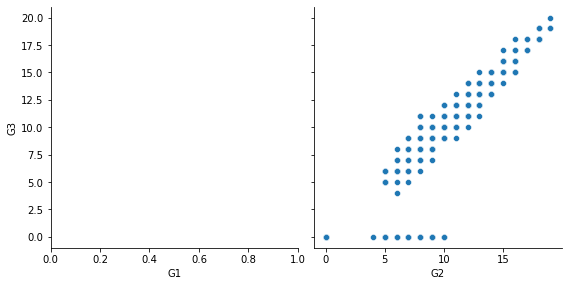

In [4]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(advertising, x_vars=['G1', 'G2'], 
             y_vars='G3', size=4, aspect=1, kind='scatter')
plt.show()

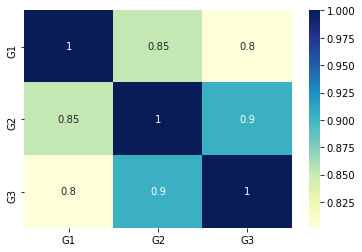

In [5]:
# Visualizing the data using heatmap
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [6]:
# Creating X and y
X = advertising['G2']
y = advertising['G3']


In [7]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [8]:
# Take a look at the train dataset
X_train
y_train

59     16
337     0
23     12
88     10
335    15
       ..
343     0
359    16
323    15
280     8
8      19
Name: G3, Length: 276, dtype: int64

In [9]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [10]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const   -1.541268
G2       1.116269
dtype: float64

In [11]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1519.
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          8.87e-114
Time:                        22:28:36   Log-Likelihood:                -552.86
No. Observations:                 276   AIC:                             1110.
Df Residuals:                     274   BIC:                             1117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5413      0.326     -4.729      0.000      -2.183      -0.900
G2             1.1163      0.029     38.975      0.000       1.060       1.173
==============================================================================
Omnibus:                      170.993   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1153.191
Skew:                          -2.548   Prob(JB):                    3.87e-251
Kurtosis:                      11.620   Cond. No.                         34.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

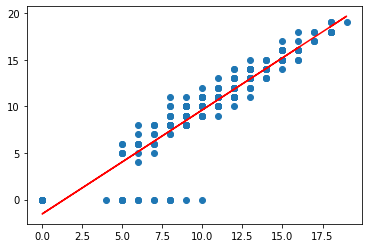

In [13]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, -1.5413 +1.1163*X_train, 'r')
plt.show()

In [17]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

188     6.272618
365     9.621426
190    11.853965
353     7.388887
166     9.621426
         ...    
45      7.388887
47     19.667850
296     8.505157
239     6.272618
394     8.505157
Length: 119, dtype: float64

In [18]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7511992187931185

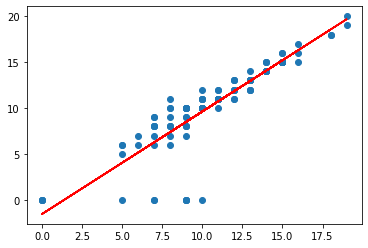

In [19]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [20]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


In [21]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1519.
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          8.87e-114
Time:                        00:01:44   Log-Likelihood:                -552.86
No. Observations:                 276   AIC:                             1110.
Df Residuals:                     274   BIC:                             1117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5413      0.326     -4.729      0.000      -2.183      -0.900
G2             1.1163      0.029     38.975      0.000       1.060       1.173
==============================================================================
Omnibus:                      170.993   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1153.191
Skew:                          -2.548   Prob(JB):                    3.87e-251
Kurtosis:                      11.620   Cond. No.                         34.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

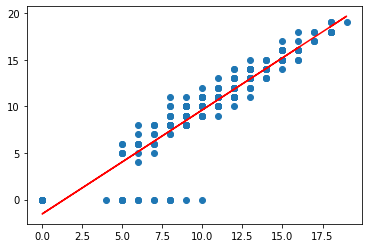

In [25]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, -1.5413 + 1.1163*X_train, 'r')
plt.show()

In [28]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

188     6.272618
365     9.621426
190    11.853965
353     7.388887
166     9.621426
         ...    
45      7.388887
47     19.667850
296     8.505157
239     6.272618
394     8.505157
Length: 119, dtype: float64

In [31]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7511992187931185

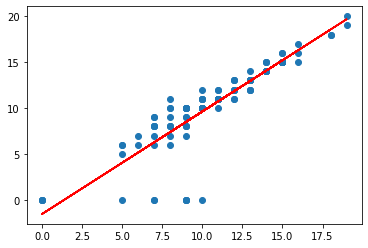

In [33]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [29]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)


In [36]:
# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [32]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [34]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : -1.541267826284754
Slope : [1.11626939]


In [3]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

NameError: name 'lm' is not defined

In [38]:
print('Accuracy: %d',(lm.score(X_train_lm, y_train_lm)))

Accuracy: %d 0.8471884764546745


In [1]:
from tkinter import *   # import tkinter
widget = Label(None, text='Hello GUI world!')   # make a widget
widget.pack(side=RIGHT) # arrange it - TOP, BOTTOM, RIGHT, LEFT
mainloop()       # start event loop
#disable pack and mainloop and check

In [4]:
import tkinter 
from tkinter import messagebox #import seperately
top = tkinter.Tk() #Root instance

def helloCallBack(): 
    messagebox.showinfo( "tkinter", "Hello World") 

B = tkinter.Button(top, text ="Hello", command = helloCallBack)
B.pack(expand=YES, fill=X) 
mainloop()

In [5]:
from tkinter import *
#Define handlers for event handling - button click
def hello(event): 
    print("Single Click, Button-l") 
    
def quit(event): #Remember to give event object
    print("Double Click, so let's stop") 
    import sys; sys.exit()

#Create button
widget = Button(None, text='Mouse Clicks')
#None represents attach the button to root parent window.
#text attribute refers the text to be displayed 

widget.pack() 
widget.bind('<Button-1>', hello) #'<Button-1>' - Single click handler
widget.bind('<Double-1>', quit) #'<Double-1>' - Double click handler
widget.mainloop()


Single Click, Button-l
Single Click, Button-l
Single Click, Button-l
Double Click, so let's stop


SystemExit: 

C:\Users\bawej\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
